In [1]:
import pandas as pd
chemin = r"C:\Users\leogu\OneDrive\Bureau\Etude\Master\Mémoire\donnees\SQLite.csv" 
data_bank = pd.read_csv(chemin)
data_bank

C:\Users\leogu\AppData\Local\Temp\ipykernel_19696\1961868021.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,nom_bank,loc_bank,invest_crypto_aout2021_mai2022,ca2019,ca2020,ca2021,ca2022,ca2023
0,Morgan Stanley,New York (USA),1100,39575,41996,56462,53794,52386.0
1,Goldman Sachs,New York (USA),698,34918,38827,58209,47476,44753.0
2,BNY Mellon,New York (USA),690,16088,15472,15633,16034,16758.0
3,Commonwealth Bank,New South Wales (AUS),421,16638,14986,16556,17657,18499.0
4,Citi,New York (USA),215,70992,64738,67923,75515,75916.0
5,UOB,Singapore,204,7422,6394,7223,8567,10275.0
6,HSBC,London (UK),200,53600,43941,46821,51849,NaN
7,Wells Fargo,California (USA),165,81276,63032,74166,73958,82643.0


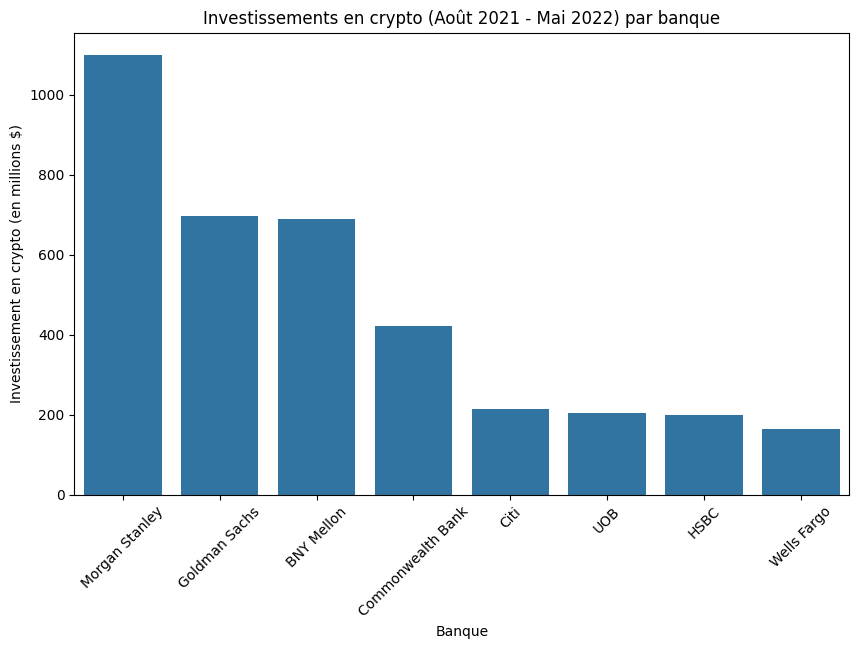

In [2]:
#import packages
import matplotlib.pyplot as plt
import seaborn as sns

#hist investissements en crypto par banque
plt.figure(figsize=(10, 6)) #taille graph
sns.barplot(x='nom_bank', y='invest_crypto_aout2021_mai2022', data=data_bank) #hist
plt.title('Investissements en crypto (Août 2021 - Mai 2022) par banque') #titre
plt.xticks(rotation=45) #rotation etiquette axe x
plt.ylabel('Investissement en crypto (en millions $)') #titre axe y
plt.xlabel('Banque') #titre axe x
plt.show() #afficher graph


Corrélation entre l'investissement en crypto et la CAGR du CA de 2019 à 2023:
                                 invest_crypto_aout2021_mai2022  cagr_2019_2023
invest_crypto_aout2021_mai2022                        1.000000        0.365276
cagr_2019_2023                                        0.365276        1.000000


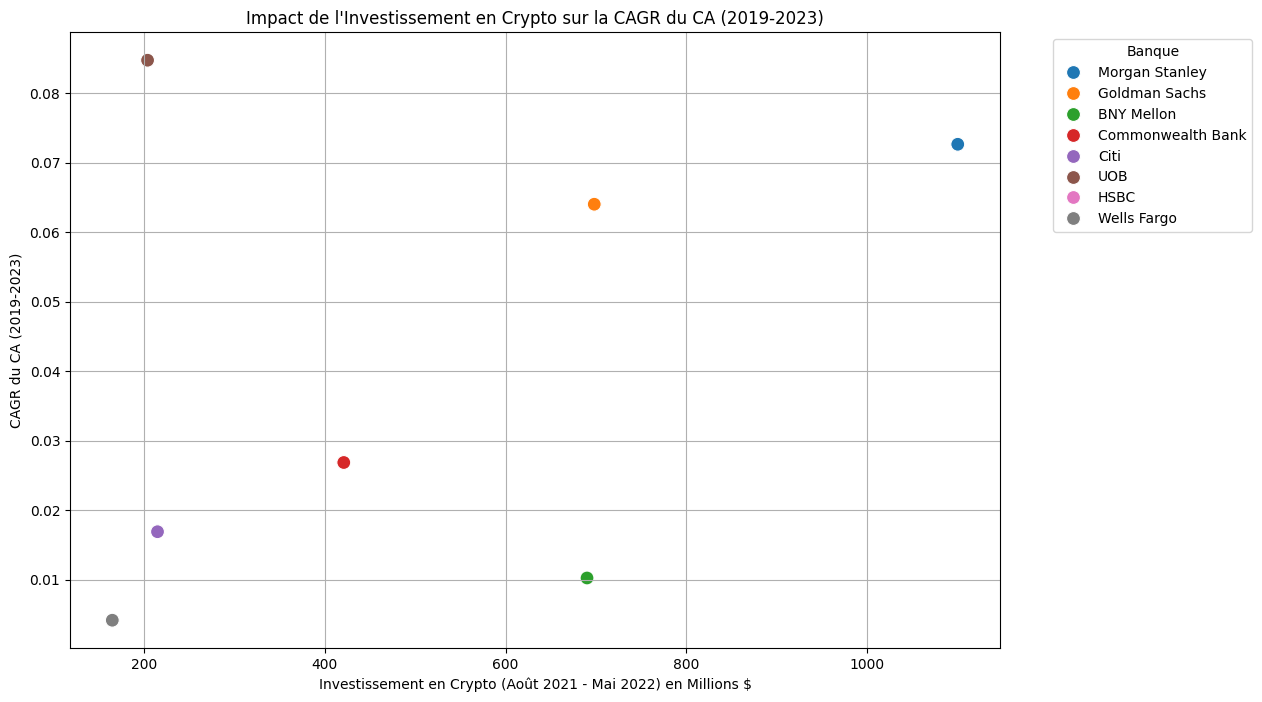

In [7]:
# Calcul de la CAGR du CA de 2019 à 2023 pour chaque banque
data_bank['cagr_2019_2023'] = ((data_bank['ca2023'] / data_bank['ca2019']) ** (1/4)) - 1

# Calcul de la corrélation entre l'investissement en crypto et la CAGR du CA
correlation_cagr_2019_2023 = data_bank[['invest_crypto_aout2021_mai2022', 'cagr_2019_2023']].corr()

# Affichage de la corrélation
print("Corrélation entre l'investissement en crypto et la CAGR du CA de 2019 à 2023:\n", correlation_cagr_2019_2023)

# Visualisation de l'impact de l'investissement en crypto sur la CAGR du CA
plt.figure(figsize=(12, 8))
sns.scatterplot(x='invest_crypto_aout2021_mai2022', y='cagr_2019_2023', data=data_bank, hue='nom_bank', s=100)
plt.title("Impact de l'Investissement en Crypto sur la CAGR du CA (2019-2023)")
plt.xlabel('Investissement en Crypto (Août 2021 - Mai 2022) en Millions $')
plt.ylabel('CAGR du CA (2019-2023)')
plt.grid(True)
plt.legend(title='Banque', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()